In [0]:
import numpy as np
import tensorflow as tf

In [0]:
import gym
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr

In [0]:
def rargmax(vector):
  m = np.amax(vector)
  indices = np.nonzero(vector == m)[0]
  return pr.choice(indices)

In [0]:
register(
  id = "FrozenLake-v3",
  entry_point = 'gym.envs.toy_text:FrozenLakeEnv',
  kwargs={'map_name':'4x4',
          'is_slippery': False}
)

env = gym.make('FrozenLake-v3')

In [0]:
# Initializer table with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n])
# Set learning parameters
num_episodes = 2000

# create lists to contain total rewards and steps per episode
rList = []

for i in range(num_episodes):
  # Reset env and get first new observation
  state = env.reset()
  rAll = 0
  done = False
  
  # The Q-Table learning algorithm
  while not done:
    action = rargmax(Q[state, :])
    new_state, reward, done, _ = env.step(action)
    
    # Update Q-Table with new knowledge using learning rate
    Q[state, action] = reward + np.max(Q[new_state, :])
    
    rAll += reward
    state = new_state
  rList.append(rAll)

Succes rate: 0.946
Final Q-Table Values
LEFT DOWN RIGHT UP
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]


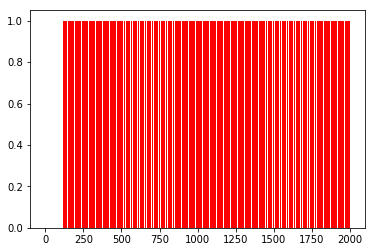

In [10]:
print("Succes rate: {}".format(sum(rList)/num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)

plt.bar(range(len(rList)), rList, color='red')
plt.show()